In [5]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/bookpage1.jpg"
img = url_to_image(url)
grayscaled = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)



downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/bookpage1.jpg


In [6]:
def show_gray_img(image):
    plt.figure(figsize=(10, 15))
    plt.imshow(image, cmap='gray')

### Objects count

## image 1

<Figure size 1080x720 with 0 Axes>

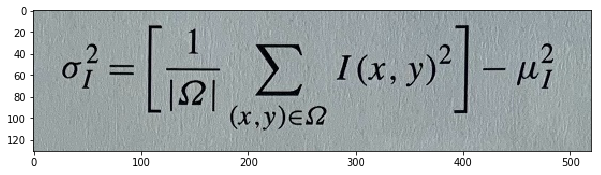

In [7]:
img1 = cv2.imread('./images2/count1.jpg')

plt.figure(figsize=(15, 10))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
show_gray_img(img)

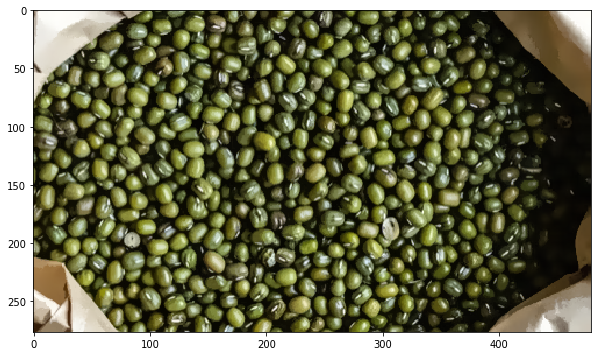

In [8]:
shifted = cv2.pyrMeanShiftFiltering(img1, 5, 20)
show_gray_img(shifted)

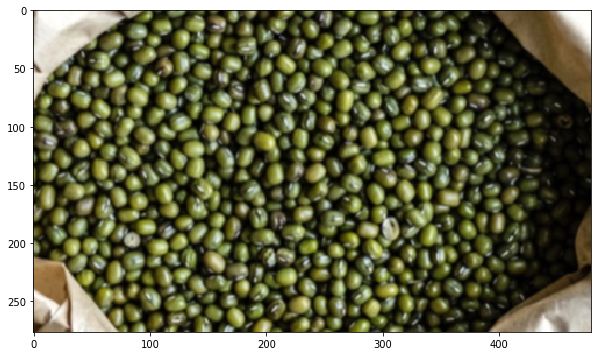

In [9]:
blurred = cv2.GaussianBlur(img1,(3,3),0)
show_gray_img(blurred)

In [10]:
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 80, 255,
cv2.THRESH_BINARY)[1]

kernel = np.ones((5,5), np.uint8) 
thresh = cv2.dilate(thresh, kernel, iterations=1) 



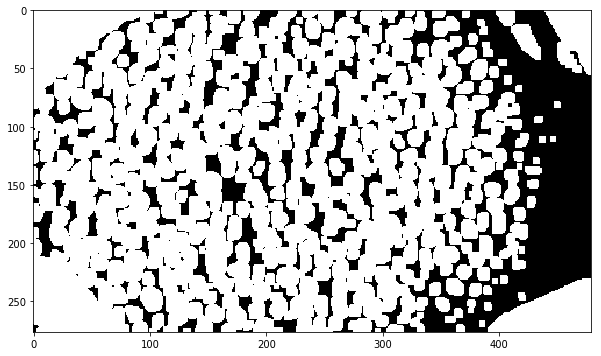

In [11]:
show_gray_img(thresh)

In [12]:
!pip install imutils

redis-py-cluster 1.3.6 has requirement redis==2.10.6, but you'll have redis 3.2.1 which is incompatible.
google-cloud-monitoring 0.28.0 has requirement google-api-core<0.2.0dev,>=0.1.1, but you'll have google-api-core 1.10.0 which is incompatible.
google-cloud-monitoring 0.28.0 has requirement google-cloud-core<0.29dev,>=0.28.0, but you'll have google-cloud-core 0.29.1 which is incompatible.
google-cloud-logging 1.11.0 has requirement google-cloud-core<2.0dev,>=1.0.0, but you'll have google-cloud-core 0.29.1 which is incompatible.
ds-object-segmentation 1.0.148 has requirement numpy==1.15.4, but you'll have numpy 1.16.2 which is incompatible.
ds-object-segmentation 1.0.148 has requirement Pillow==5.3.0, but you'll have pillow 5.4.1 which is incompatible.
ds-object-segmentation 1.0.148 has requirement scikit-image==0.14.1, but you'll have scikit-image 0.15.0 which is incompatible.
ds-serving-sdk 1.0.0 has requirement opencv-python<4.0.1,>=4.0.0, but you'll have opencv-python 4.1.0.25 wh

[INFO] 45 unique contours found


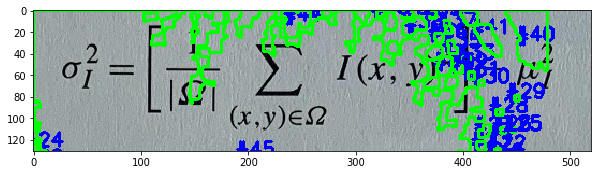

In [13]:
import imutils
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))

image = img.copy()

# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

show_gray_img(image)

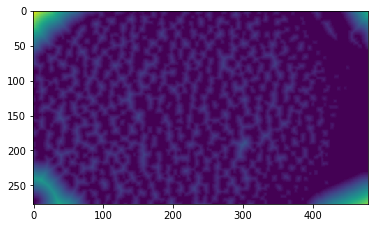

In [14]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

D = ndimage.distance_transform_edt(thresh)
plt.imshow(D)

In [15]:
localMax = peak_local_max(D, indices=False, min_distance=15, labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

#cv2_imshow(img)

[INFO] 115 unique segments found


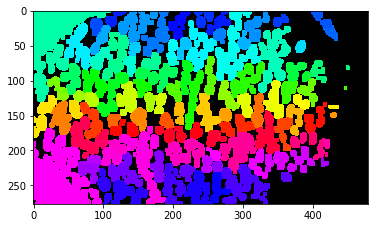

In [16]:
plt.imshow(labeled_img)

## picture 2

trying to unify solution

In [17]:
def objects_count(img_path,
                  blur_kernel_size=3,
                  threshold=80,
                  dilate_kernel_size=5,
                  peak_local_max_distance=15,
                  pyr_mean_shift_1=11,
                  pyr_mean_shift_2=21,
                  print_steps=False):
    
    img = cv2.imread(img_path)

    plt.figure(figsize=(15, 10))
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    shifted = cv2.pyrMeanShiftFiltering(img, pyr_mean_shift_1, pyr_mean_shift_2)
    
    blurred = cv2.GaussianBlur(shifted, (blur_kernel_size,blur_kernel_size), 0)
    
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    
    thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]

    kernel = np.ones((dilate_kernel_size, dilate_kernel_size), np.uint8) 
    thresh = cv2.dilate(thresh, kernel, iterations=1) 
    # find contours in the thresholded image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    print("[INFO] {} unique contours found".format(len(cnts)))

    image = img.copy()

    # loop over the contours
    for (i, c) in enumerate(cnts):
        # draw the contour
        ((x, y), _) = cv2.minEnclosingCircle(c)
        cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    
    D = ndimage.distance_transform_edt(thresh)
    
    localMax = peak_local_max(D, indices=False, min_distance=peak_local_max_distance, labels=thresh)
 
    # perform a connected component analysis on the local peaks,
    # using 8-connectivity, then appy the Watershed algorithm
    markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
    labels = watershed(-D, markers, mask=thresh)
    print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    #cv2_imshow(img)
    
    if print_steps:
        show_gray_img(img)
        show_gray_img(shifted)
        show_gray_img(blurred)
        show_gray_img(thresh)
        show_gray_img(image)
        plt.imshow(D)
        plt.imshow(labeled_img) 
    
    return len(np.unique(labels)) - 1

In [18]:
from itertools import product

In [19]:
list(product([1, 2], [22, 33, 55]))

[(1, 22), (1, 33), (1, 55), (2, 22), (2, 33), (2, 55)]

In [20]:
from collections import OrderedDict

In [29]:
params_dict = dict(
    blur_kernel_size=[3],
    threshold=[100],
    dilate_kernel_size=[3,],
    peak_local_max_distance=[5, ],
    pyr_mean_shift_1=[15, 20, 30],
    pyr_mean_shift_2=[40, 50, 70],
    print_steps=[False]
)

In [30]:
objects_count('./images2/count1.jpg', *(3, 80, 5, 15, 11, 21, False))

[INFO] 38 unique contours found
[INFO] 103 unique segments found


103

<Figure size 1080x720 with 0 Axes>

In [31]:
objects_count('./images2/count1.jpg')

[INFO] 38 unique contours found
[INFO] 103 unique segments found


103

<Figure size 1080x720 with 0 Axes>

In [32]:
max_val = 0

for item in product(*params_dict.values()): 
    print(item)
    calculated_max = objects_count('./images2/count1.jpg', *item)
    if max_val < calculated_max:
        max_val = calculated_max
        
    print('Current max: {}'.format(max_val))    
    print(' \n')

(3, 100, 3, 5, 15, 40, False)
[INFO] 263 unique contours found
[INFO] 421 unique segments found
Current max: 421
 

(3, 100, 3, 5, 15, 50, False)
[INFO] 267 unique contours found
[INFO] 424 unique segments found
Current max: 424
 

(3, 100, 3, 5, 15, 70, False)
[INFO] 284 unique contours found
[INFO] 402 unique segments found
Current max: 424
 

(3, 100, 3, 5, 20, 40, False)
[INFO] 266 unique contours found
[INFO] 426 unique segments found
Current max: 426
 

(3, 100, 3, 5, 20, 50, False)
[INFO] 275 unique contours found
[INFO] 430 unique segments found
Current max: 430
 

(3, 100, 3, 5, 20, 70, False)
[INFO] 298 unique contours found
[INFO] 401 unique segments found
Current max: 430
 

(3, 100, 3, 5, 30, 40, False)
[INFO] 275 unique contours found
[INFO] 430 unique segments found
Current max: 430
 

(3, 100, 3, 5, 30, 50, False)
[INFO] 286 unique contours found
[INFO] 425 unique segments found
Current max: 430
 

(3, 100, 3, 5, 30, 70, False)
[INFO] 308 unique contours found
[INFO] 41

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

[INFO] 258 unique contours found
[INFO] 434 unique segments found


434

<Figure size 1080x720 with 0 Axes>

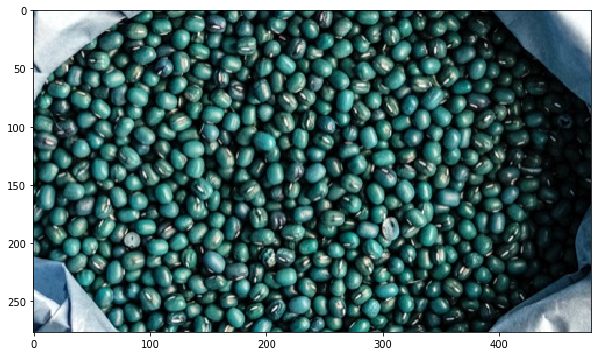

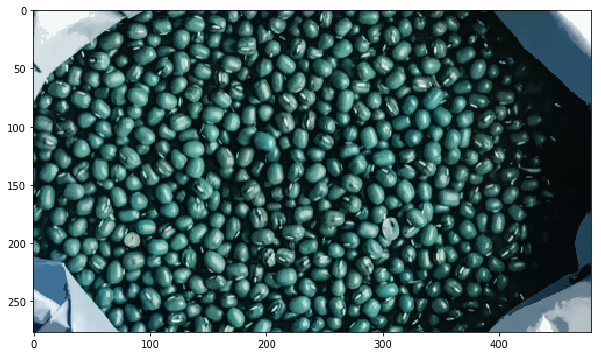

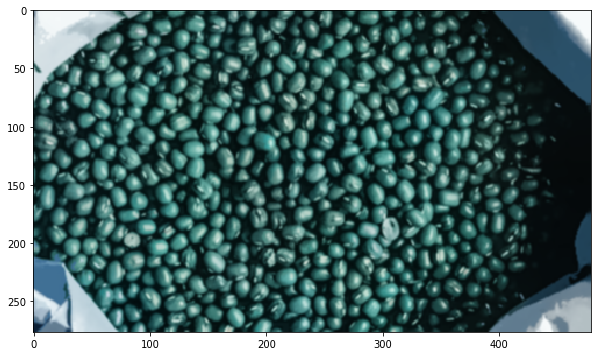

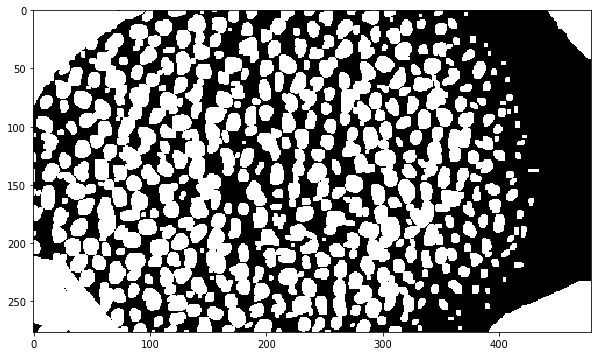

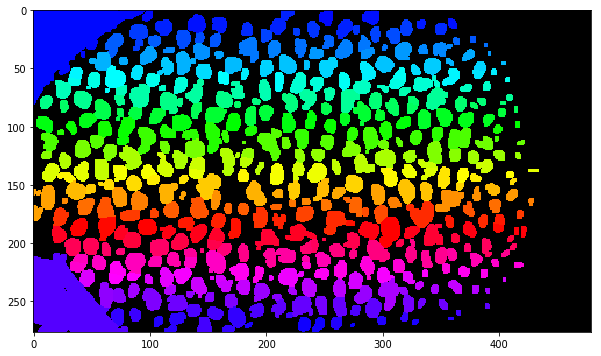

In [34]:
params = (3, 100, 3, 5, 20, 30, True) # 440
objects_count('./images2/count1.jpg', *params,)